# Semesterprojekt - "Fitting Trends" - Phil Dolz 

01. Notwendig Packages/ Bibliotheken importieren:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from scipy.stats import linregress

02. Daten importieren: 

In [2]:
df = pd.read_excel('data/Bernecker.xlsx', sheet_name = 'replicates')
print(df["Sample"].unique())

['Carrara_low1' 'ETH4_low1' 'ETH4_low2' '25C' '1000C' 'HG_low11'
 'Carrara_low2' 'HG_low12' 'Carrara_low3' 'ETH4_low3' 'ETH4_low4'
 'Carrara_low4' 'Carrara_low5' 'HG_low2' 'Carrara_low6' 'Carrara_low7'
 'Carrara_low8' 'Carrara_low9' 'Carrara_low10' 'Carrara_low11' 'HG_low3'
 'Carrara_low12' 'Carrara' 'HG_low4' 'Carrara_low13' 'Carrara_low14'
 'Carrara_low15' 'Carrara_low16' 'Carrara_low17' 'Carrara_low18'
 'Carrara_low19' 'Carrara_low20' 'HG_low5' 'Carrara_low21' 'Carrara_low22'
 'HG_low7' 'HG_low1' 'Carrara_low23' 'Carrara_low24' 'Carrara_low25'
 'Carrara_low26' 'Carrara_low27' 'Carrara_low28' 'Carrara_low29'
 'Carrara_low30' 'Carrara_low31' 'Carrara_low32' 'Carrara_low33'
 'Carrara_low34' 'Carrara_low35' 'Carrara_low36' 'Carrara_low37'
 'Carrara_low38' 'Carrara_low39' 'Carrara_low40' 'Carrara_low41'
 'Carrara_low42' 'Carrara_low43' 'Carrara_low44' 'Carrara_low45'
 'Carrara_low46' 'ETH1_low18' 'ETH1_low1' 'ETH2_low1' 'ETH2_low2' 'ETH-3'
 'ETH3_low1' 'ETH4_low5' 'ETH4_low6' 'ETH1_low2'

03. Probennamen bearbeiten/ zusammenfassen & DataFrames erstellen:

In [3]:
df_bellow = df.loc[~pd.isna(df['Bellow'])]
df_bellow["Sample"] = df_bellow["Sample"].str.replace("-","")

conditions = ['Carrara', 'ETH1', 'ETH2', 'ETH3', 'ETH4']
conditions_df = []

for condition in conditions:
    condition = df_bellow.loc[df_bellow["Sample"].str.contains(condition)]
    conditions_df.append(condition)
      

C:\Users\Phil\AppData\Local\Temp\ipykernel_34840\3783862930.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bellow["Sample"] = df_bellow["Sample"].str.replace("-","")


# Daten für die Normalisierung vorbereiten

Y-Werte aller Proben-Gruppen extrahieren, welche > 30 mbar sind - für D47

In [4]:
conditions_names = ['Carrara', 'ETH1', 'ETH2', 'ETH3', 'ETH4']
conditions_y_lists_47 = {}

for condition_name, df in zip(conditions_names, conditions_df):
    conditions_y_lists_47[condition_name] = df.loc[df['Bellow'] > 30, 'D47'].tolist()
     
for condition_name, y_values in conditions_y_lists_47.items():
    print(f"Y-Werte für {condition_name}: {y_values}")

Y-Werte für Carrara: [0.326523, 0.318561, 0.313182, 0.299223, 0.295335, 0.31829, 0.30914, 0.302768, 0.295389, 0.2949, 0.32007, 0.309285, 0.308432, 0.320009, 0.301522, 0.299295, 0.295605, 0.337941, 0.299925, 0.307596, 0.305057, 0.311648, 0.313352, 0.304237]
Y-Werte für ETH1: [0.192031, 0.21477, 0.227742, 0.208633, 0.211827, 0.211405, 0.199083, 0.188942, 0.199867, 0.211024, 0.217953, 0.212231]
Y-Werte für ETH2: [0.216539, 0.202926, 0.215585, 0.201568, 0.204886, 0.205641, 0.19616, 0.218571, 0.202351, 0.210903, 0.209293]
Y-Werte für ETH3: [0.610161, 0.608452, 0.608053, 0.613977, 0.605212, 0.60933, 0.618122, 0.600057, 0.604542, 0.620605]
Y-Werte für ETH4: [0.45072, 0.460698, 0.43831, 0.462526, 0.454822, 0.45041, 0.432704, 0.443986, 0.454175, 0.469857, 0.45708]


Durchschnitte für alle Proben-Gruppen errechnen - D47:

In [5]:
average_values_47 = {}

for condition_name, y_values in conditions_y_lists_47.items():
    average = np.mean(y_values)
    average_values_47[condition_name] = average

for condition_name, average in average_values_47.items():
    print(f"Durchschnitt für {condition_name}: {average}")

Durchschnitt für Carrara: 0.308636875
Durchschnitt für ETH1: 0.207959
Durchschnitt für ETH2: 0.20767481818181818
Durchschnitt für ETH3: 0.6098511
Durchschnitt für ETH4: 0.45229890909090914


Text(0.5, 1.0, 'Plot with all samples')

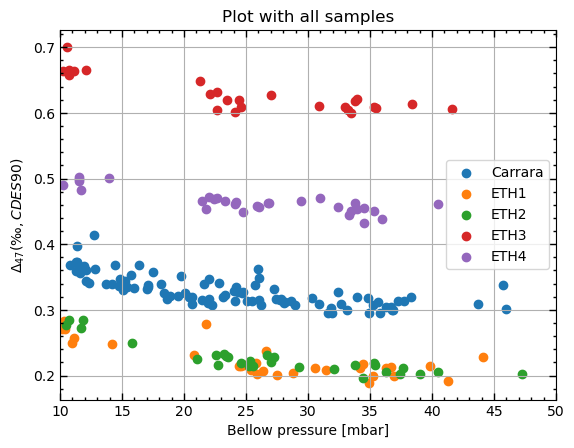

In [6]:
for sample in conditions_names:
    df_sample = df_bellow.loc[df_bellow['Sample'].str.contains(sample)]
    plt.scatter(df_sample['Bellow'],df_sample['D47'], label = sample )

ax = plt.gca()
plt.xlabel('Bellow pressure [mbar]')
plt.ylabel('$\Delta_{47} (‰, CDES90)$')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.minorticks_on()
ax.tick_params(which = 'major', length = 5, width = 1, direction = 'in')
ax.tick_params(which = 'minor', length = 2, width = 1, direction = 'in')
ax.set_xlim(10,50)
ax.grid()
plt.legend()
plt.title('Plot with all samples')



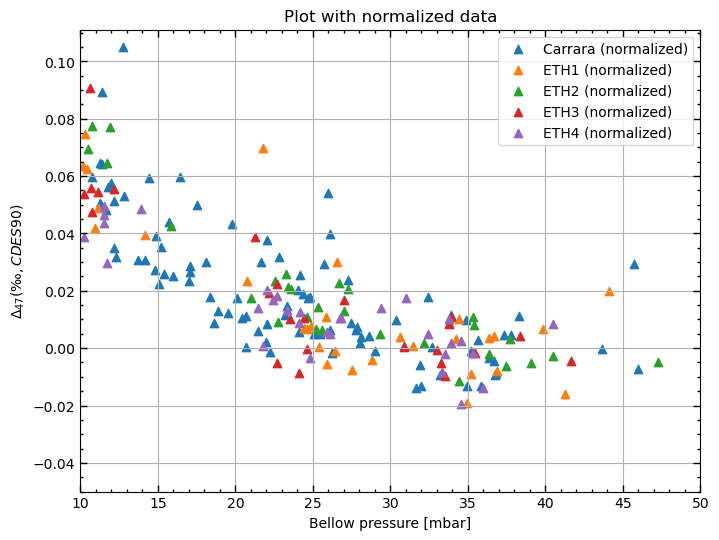

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))

all_x = []
all_y = []
for i, (df, condition_name) in enumerate(zip(conditions_df, conditions_names)):
    normalized_y_values_47 = df['D47'] - average_values_47[condition_name]
    all_x.extend(df['Bellow'])
    all_y.extend(normalized_y_values_47)
    ax.scatter(df['Bellow'], normalized_y_values_47, label=f"{condition_name} (normalized)", marker='^')
    
ax = plt.gca()
ax.set_xlabel('Bellow pressure [mbar]')
ax.set_ylabel('$\Delta_{47} (‰, CDES90)$')
ax.minorticks_on()
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.tick_params(which = 'major', length = 5, width = 1, direction = 'in')
ax.tick_params(which = 'minor', length = 2, width = 1, direction = 'in')

ax.set_ylim(bottom=-0.05)  
ax.set_xlim(10,50)

ax.grid()
plt.legend()

plt.title("Plot with normalized data")
plt.show() 

# Funktion für die Fit's erstellen:

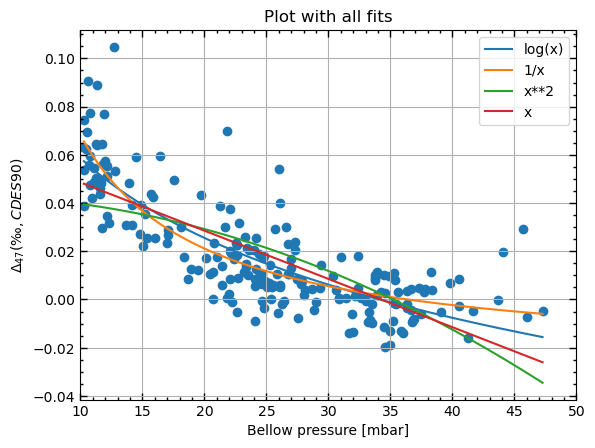

In [8]:
def fitFunction(x, y, kind):
    if kind == 'log(x)':                   
        fit_x = np.log10(np.array(x))
    elif kind == '1/x':                 
        fit_x =  1/np.array(x)
    elif kind == 'x**2':                
        fit_x = np.array(x) ** 2
    else:                       
        fit_x = x
        
        
    slope, intercept, r_value, p_value, std_err = linregress(fit_x , y)
    
    x_plot = np.array([*np.arange(min(x)+0.1, max(x), (max(x)-min(x))/200), max(x)])
    
    
    if kind == 'log(x)':
        fit_x = np.log10(x_plot)
    elif kind == '1/x':
        fit_x = 1/np.array(x_plot)
    elif kind == 'x**2':
        fit_x = np.array(x_plot) ** 2
    else:
        fit_x = x_plot


    resy =[]
    for point in fit_x:
        resy.append(point * slope + intercept)

    return {
        "slope": slope,
        "intercept": intercept,
        "r_value": r_value,
        "p_value": p_value,
        "std_err": std_err,
        "x": x_plot,
        "y": resy,
    }

def fit_data(x,y, kind):
    result = fitFunction(x,y, kind)
    
    plt.plot(result['x'], result['y'],label = kind) 

    
plt.scatter(all_x, all_y)
fit_data(all_x,all_y, 'log(x)')
fit_data(all_x,all_y, '1/x')
fit_data(all_x,all_y, 'x**2')
fit_data(all_x,all_y, 'x')


ax = plt.gca()
plt.xlabel('Bellow pressure [mbar]')
plt.ylabel('$\Delta_{47} (‰, CDES90)$')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.minorticks_on()
ax.tick_params(which = 'major', length = 5, width = 1, direction = 'in')
ax.tick_params(which = 'minor', length = 2, width = 1, direction = 'in')
ax.set_xlim(10,50)
ax.grid()

plt.legend()
plt.title('Plot with all fits')

plt.show()









# 1/x Fit in die oberen Plots einfügen

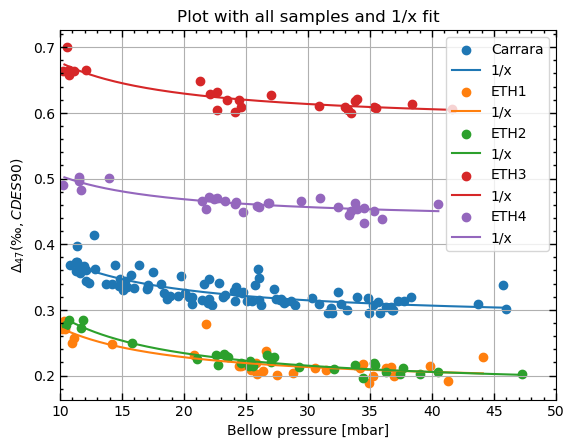

In [9]:
for sample in conditions_names:
    df_sample = df_bellow.loc[df_bellow['Sample'].str.contains(sample)]
    plt.scatter(df_sample['Bellow'],df_sample['D47'], label = sample )
   
    fit_data(df_sample['Bellow'],df_sample['D47'], '1/x')  
    
ax = plt.gca()
plt.xlabel('Bellow pressure [mbar]')
plt.ylabel('$\Delta_{47} (‰, CDES90)$')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.minorticks_on()
ax.tick_params(which = 'major', length = 5, width = 1, direction = 'in')
ax.tick_params(which = 'minor', length = 2, width = 1, direction = 'in')
ax.set_xlim(10,50)
ax.grid()
plt.legend()
plt.title('Plot with all samples and 1/x fit')


plt.show()

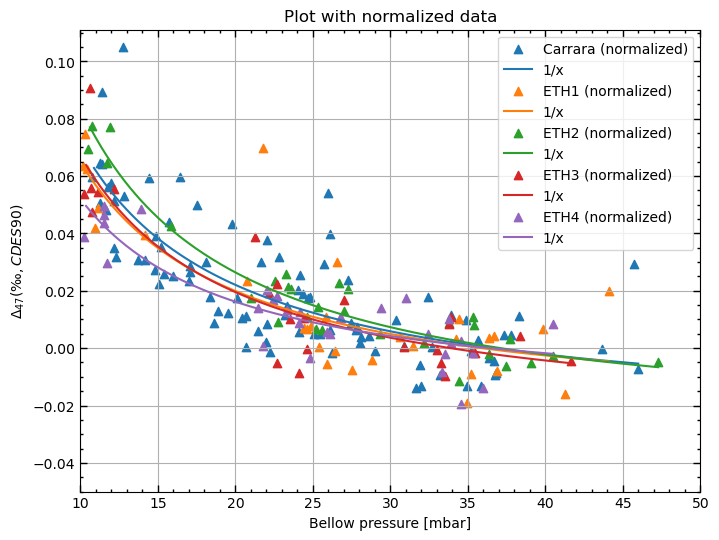

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))

all_x = []
all_y = []
for i, (df, condition_name) in enumerate(zip(conditions_df, conditions_names)):
    normalized_y_values_47 = df['D47'] - average_values_47[condition_name]
    all_x.extend(df['Bellow'])
    all_y.extend(normalized_y_values_47)
    ax.scatter(df['Bellow'], normalized_y_values_47, label=f"{condition_name} (normalized)", marker='^')
    
    fit_data(df['Bellow'], normalized_y_values_47, '1/x') 
    
    
ax = plt.gca()
ax.set_xlabel('Bellow pressure [mbar]')
ax.set_ylabel('$\Delta_{47} (‰, CDES90)$')
ax.minorticks_on()
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.tick_params(which = 'major', length = 5, width = 1, direction = 'in')
ax.tick_params(which = 'minor', length = 2, width = 1, direction = 'in')

ax.set_ylim(bottom=-0.05)  
ax.set_xlim(10,50)

ax.grid()
plt.legend()

plt.title("Plot with normalized data")
plt.show()